# 🛰️ Análise Geoespacial do Saneamento Básico – Barcarena, Belém e Breves (PA)

Este notebook apresenta a visualização dos dados de saneamento básico (água, esgoto e resíduos sólidos) nos municípios de Barcarena, Belém e Breves, destacando-os sobre o mapa do estado do Pará. Também é gerado um gráfico de barras comparando os três indicadores entre os municípios.

## Bibliotecas

In [183]:
import os
print("Diretório atual:", os.getcwd())

Diretório atual: c:\Users\Teambest\Desktop\matheus_meissner\dev\snis\scripts


In [184]:
# Importação de bibliotecas
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import seaborn as sns
import numpy as np

## Tamanho Padrão

In [185]:
# Ajuste do tamanho padrão das figuras
plt.rcParams.update({'figure.figsize': (10, 6)})

## Define Caminhos para Arquivos de Dados

In [186]:
# Definição dos caminhos para os arquivos de dados
CAMINHO_PA = '../dados_shapefile/PA_Municipios_2022.shp'
CAMINHO_AGUA = '../dados_finais/agua.geojson'
CAMINHO_ESGOTO = '../dados_finais/esgoto.geojson'
CAMINHO_LIXO = '../dados_finais/lixo.geojson'

## Paleta de cores para os mapas

In [187]:
# Paleta de cores para os mapas
cmap_agua = 'Blues'
cmap_esgoto = 'Purples'
cmap_lixo = 'Greens'

## Plota o mapa do estado

In [188]:
def plot_mapa_com_estado(gdf_para, gdf_dados, coluna, titulo, cmap):
    import matplotlib.pyplot as plt
    from matplotlib.patches import FancyArrowPatch

    fig, ax = plt.subplots(figsize=(12, 10))

    # Plota o mapa base do estado
    gdf_para.plot(ax=ax, color='#eeeeee', edgecolor='black', linewidth=0.5)

    # Plota os municípios com dados
    gdf_dados.plot(column=coluna, cmap=cmap, edgecolor='black', linewidth=1, legend=True, ax=ax)

    # Parâmetros para offset circular dos textos
    radius = 1.0  # raio do deslocamento
    angle_step = 360 / len(gdf_dados)  # espaçamento angular entre rótulos

    for idx, row in gdf_dados.iterrows():
        x, y = row.geometry.centroid.coords[0]
        nome = row['municipio'].capitalize()
        valor = row[coluna]

        # Calcula ângulo com espaçamento
        angle = idx * angle_step
        radians = angle * (3.14159265 / 180)

        # Coordenadas deslocadas do texto (em círculo ao redor do ponto)
        tx = x + radius * np.cos(radians)
        ty = y + radius * np.sin(radians)

        # Linha de ligação
        ax.plot([x, tx], [y, ty], color='gray', linewidth=0.7)

        # Caixa de texto
        ax.text(tx, ty, f"{nome}\n{valor:.1f}%", fontsize=9, weight='bold',
                ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='gray', lw=0.5))

    ax.set_title(titulo, fontsize=16, pad=20)
    ax.axis('off')
    plt.tight_layout()
    plt.show()


## Gera gráfico de barras

In [189]:
# Função para gerar gráfico de barras comparativo entre os municípios
def plot_grafico_barra(gdfs, colunas, titulo):
    df = gdfs[0][['municipio', colunas[0]]].copy()
    df[colunas[1]] = gdfs[1][colunas[1]]
    df[colunas[2]] = gdfs[2][colunas[2]]
    df.set_index('municipio', inplace=True)
    df.plot(kind='bar')
    plt.title(titulo)
    plt.ylabel('% / Volume per capita')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Inicia Visualização

In [190]:
# Execução do pipeline de visualização
print('--- VISUALIZAÇÃO GEOGRÁFICA DO PARÁ + MUNICÍPIOS COM DADOS ---')

--- VISUALIZAÇÃO GEOGRÁFICA DO PARÁ + MUNICÍPIOS COM DADOS ---


## Carrega Dados geográficos

In [191]:
# Carregamento dos dados geográficos
gdf_para = gpd.read_file(CAMINHO_PA)
gdf_agua = gpd.read_file(CAMINHO_AGUA)
gdf_esgoto = gpd.read_file(CAMINHO_ESGOTO)
gdf_lixo = gpd.read_file(CAMINHO_LIXO)

## Normaliza nomes do municípios

In [192]:
# Normalização dos nomes dos municípios
gdf_para['NM_MUN'] = gdf_para['NM_MUN'].str.upper()
for gdf in [gdf_agua, gdf_esgoto, gdf_lixo]:
    gdf['municipio'] = gdf['municipio'].str.upper()


## Mapas

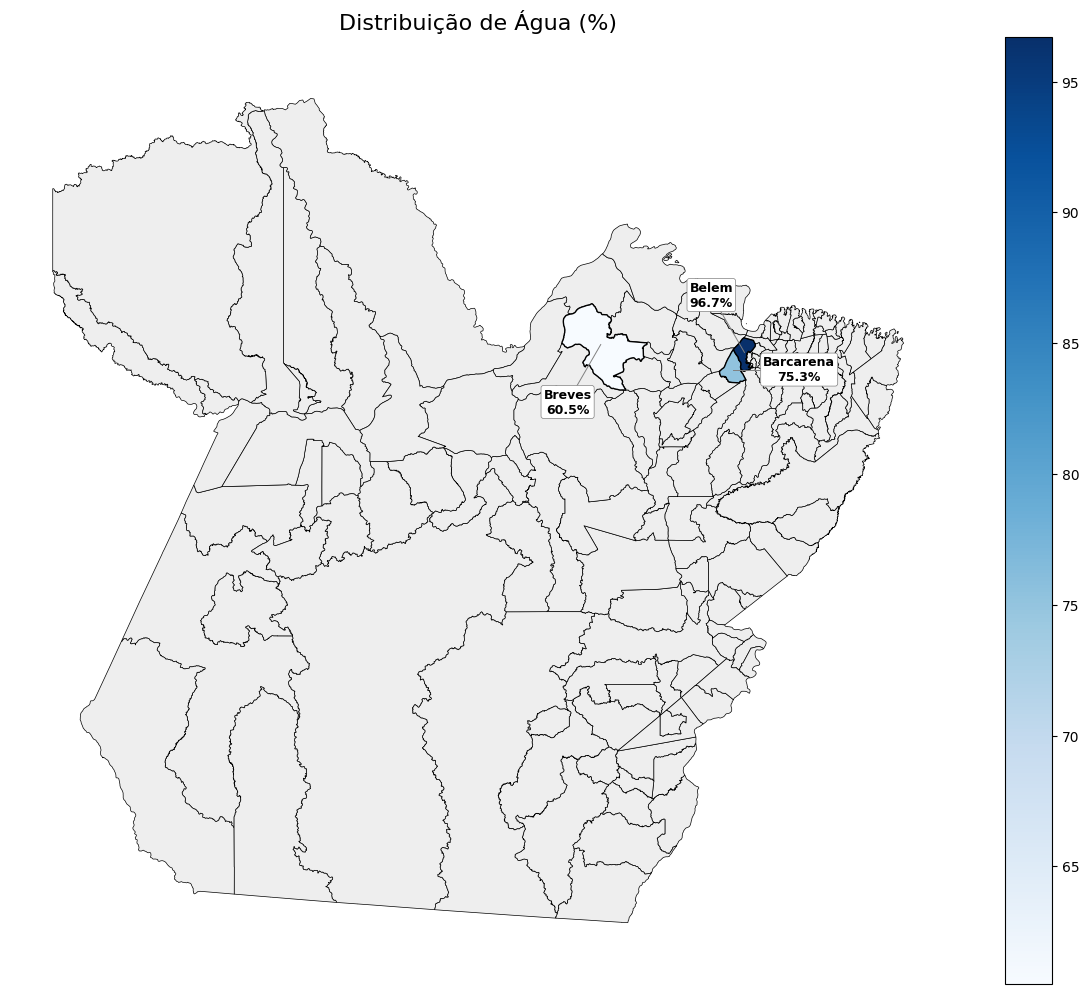

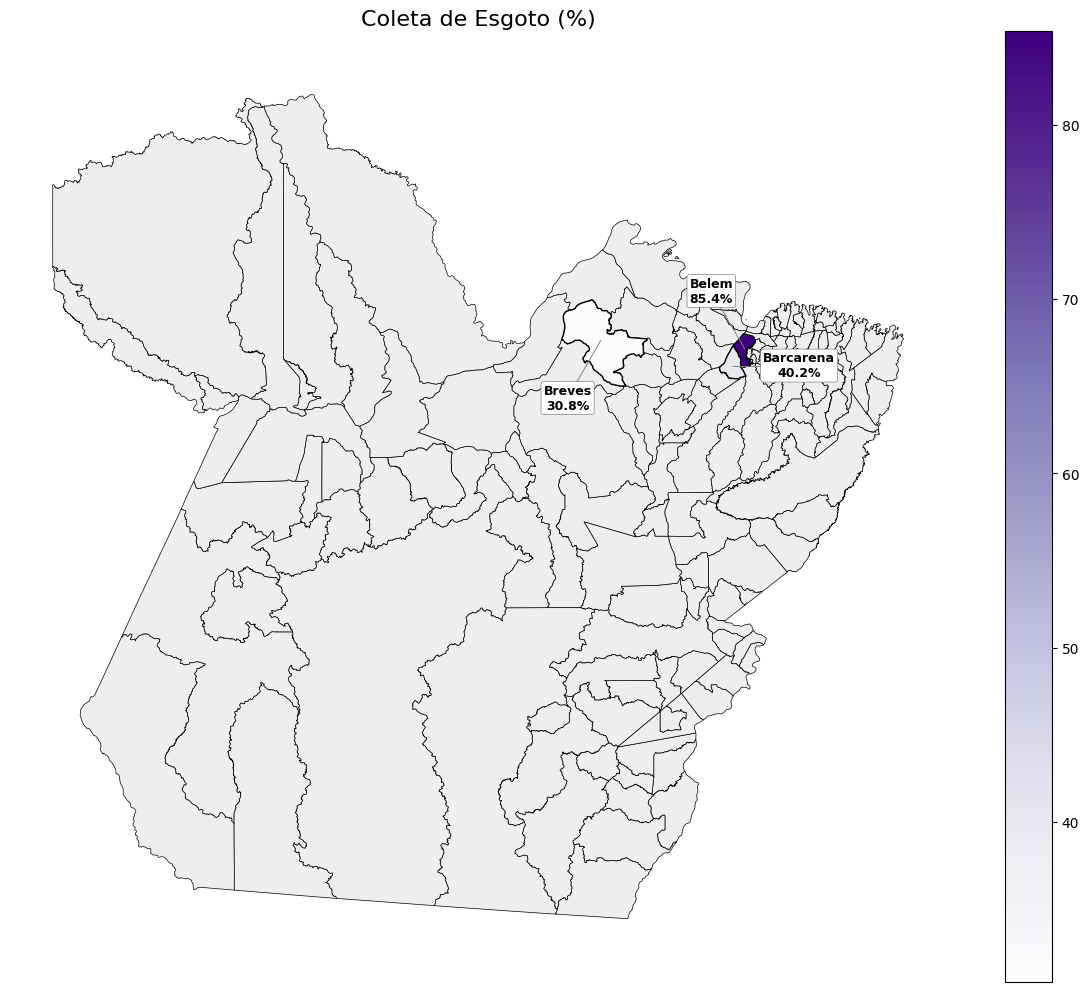

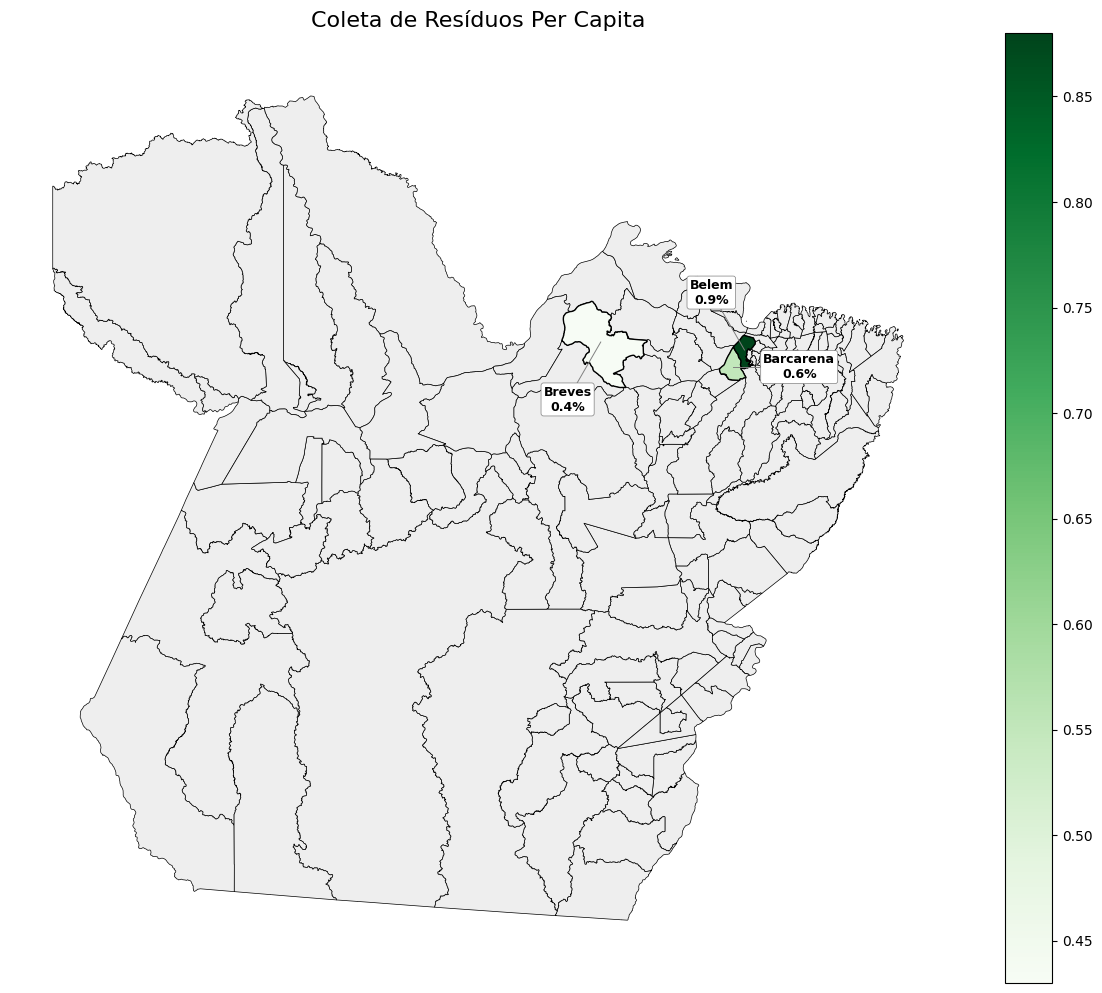

In [193]:
# Mapas
plot_mapa_com_estado(gdf_para, gdf_agua, 'agua_percentual', 'Distribuição de Água (%)', cmap_agua)
plot_mapa_com_estado(gdf_para, gdf_esgoto, 'esgoto_percentual', 'Coleta de Esgoto (%)', cmap_esgoto)
plot_mapa_com_estado(gdf_para, gdf_lixo, 'residuos_per_capita', 'Coleta de Resíduos Per Capita', cmap_lixo)

## Gráfico Comparativo

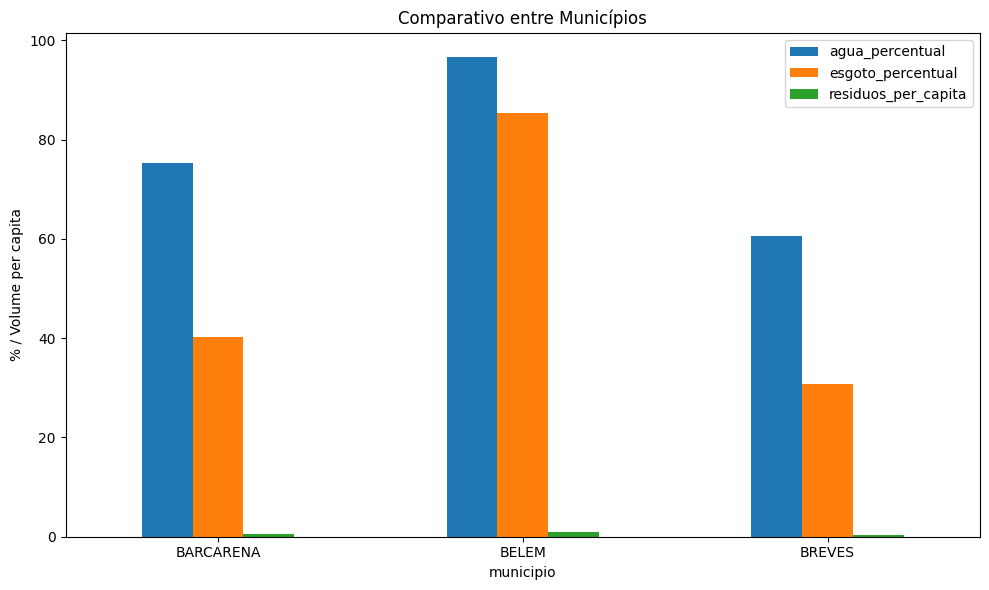

In [194]:
# Gráfico comparativo
plot_grafico_barra(
    [gdf_agua, gdf_esgoto, gdf_lixo],
    ['agua_percentual', 'esgoto_percentual', 'residuos_per_capita'],
    'Comparativo entre Municípios'
)

## Mensagem de êxito

In [195]:
print('[✓] Visualizações completas com fundo do Pará geradas com sucesso!')

[✓] Visualizações completas com fundo do Pará geradas com sucesso!


## Testes

In [196]:
import pandas as pd
from unidecode import unidecode
import re

# Caminho do arquivo
CAMINHO = '../dados_processados/snis_agua_2022.csv'

# Função de limpeza e correção de nome de município
def limpar_nome(mun):
    mun = unidecode(str(mun))             # Remove acentos
    mun = re.sub(r'[^\w\s]', '', mun)     # Remove símbolos estranhos
    mun = mun.strip().upper()             # Remove espaços e padroniza
    if 'BELACM' in mun or 'BEL' in mun and 'CM' in mun:
        return 'BELEM'                    # Corrige erro de codificação específica
    return mun

# Leitura do CSV
df = pd.read_csv(CAMINHO, sep=';', encoding='latin1')

# Aplicar limpeza
df['Municipio'] = df['Municipio'].apply(limpar_nome)

# Verificação
print("\n--- Municípios únicos após limpeza ---")
print(df['Municipio'].unique())

print("\n--- Dados de Belém ---")
print(df[df['Municipio'] == 'BELEM'][['Municipio', 'IN058']])

print("\n--- Primeiras linhas do DataFrame ---")
print(df[['Municipio', 'IN058']].head())



--- Municípios únicos após limpeza ---
['BARCARENA' 'BELEM' 'BREVES']

--- Dados de Belém ---
  Municipio  IN058
1     BELEM   96.7

--- Primeiras linhas do DataFrame ---
   Municipio  IN058
0  BARCARENA   75.3
1      BELEM   96.7
2     BREVES   60.5
